# Homework 7
Question 5. Based on example E7 in the textbook, starting on page 266
Be sure to read along.
    
First we import some libraries and define the experimental data as given in the textbook: $P_{CO}$ and $P_{H_2}$ are the partial pressures of carbon monoxide and hydrogen entering the reactor (in atmospheres), and $C_{CH_4}$ is the concentration of methane leaving it (in moles per decimeter cubed).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats
import scipy.optimize

PCO = np.array([1, 1.8, 4.08, 1, 1, 1])
PH2 = np.array([1, 1, 1, 0.1, 0.5, 4])
CCH4 = np.array([1.73e-4, 4.4e-4, 10e-4, 1.65e-4, 2.47e-4, 1.75e-4])


## (a)
Calculate an array of values for $r'_{CH_4}$, the rate of formation of methane in mol per gram of catalyst per minute.  The exit volumetric flow rate from the differential packed bed containing 10 g of catalyst was maintained at 300 dm<sup>3</sup>/min for each run. Call your array `rCH4`. It should have 6 elements, corresponding to the arrays above.

In [ ]:
## your code here


In [3]:
# Some checks that should pass without error:
assert 'rCH4' in globals(), "Didn't call it 'rCH4'?"
assert len(rCH4)==6, "Doesn't have 6 elements"
for r,c in zip(rCH4, CCH4):
    assert round(r/c,5)==30, "Doesn't have right values"

## (b) 
Use the first three data points where $P_{H_2}$ is constant (remember how to slice an array?), and assuming power law kinetics for the dependence on $P_{CO}$, perform linear regression with `scipy.stats.linregress` to find the $\alpha$ in $r'_{CH_4} = k' P_{CO}^\alpha$.
Store this in a variable called `alpha`.
Plot the graph, showing both the data and the fitted line.

In [ ]:
## your code here


In [5]:
# A check that it's right
assert 'alpha' in globals(), "Did you call it alpha?"
assert round(alpha,5) == round(1.2323408809505318,5)

From this we assume that $\alpha$ (the exponent for $P_{CO}$) is 1. (The book assures us that if we had more data, we would find the slope is closer to 1)

## (c)
Read through page 269. Define a function `rate_law(partial_pressures, a, b, beta1, beta2)` which takes five variables and returns the rate $r'_{CH_4}$ according to equation (E7-4.11) in the textbook. The first argument to your function, `partial_pressures`, will contain two elements, $(P_{CO}, P_{H_2})$, which you can index as `partial_pressures[0]` and `partial_pressures[1]`.

In [ ]:
## your code here


In [7]:
# Some checks that your rate_law is correct:
assert 'rate_law' in globals(), "Did you call it 'rate_law'?"
assert rate_law((0,0), 1, 1, 1, 1) == 0
assert rate_law((1.,1.), 1., 1., 1., 1.) == 0.5
assert rate_law((10.,1.), 2., 1., 1., 1.) == 10.
assert rate_law((10.,5.), 2., 0., 2., 1.) == 500.
assert round(rate_law((10.,10.), 2., 2., 2., 2.),5) == round(9.950248756218905,5)

Now we need to find values for the parameters `a, b, beta1, beta2` by regressing against the experimental data. Our `x_data` needs to be the $P_{CO}$ and $P_{H_2}$ arrays, stacked. Check carefully that you understand what is happening:

In [8]:
x_data = np.stack((PCO, PH2))
y_data = rCH4

parameters, covariance = scipy.optimize.curve_fit(rate_law, x_data, y_data)
errors = np.sqrt(np.diag(covariance))
for i, parameter_name in enumerate(['a', 'b', 'beta1', 'beta2']):
    print("{}: {} +/- {}".format(parameter_name, parameters[i], errors[i]))

a: 0.0246236195251 +/- 0.110859749884
b: 2.39807575577 +/- 15.331686283
beta1: 0.607552629352 +/- 1.59491609387
beta2: 1.02195126285 +/- 0.722583076141


The uncertainty on $\beta_1$ is large, but we have reason to believe (chapter 10 on heterogeneous reactions) that $\beta_1=0.5$ and $\beta_2 = 1.0$ are reasonable.  
Fixing those parameters, define a new rate law, `rate_law2(partial_pressures, a, b)` and regress again to find the new $a$ and $b$. Store these in variables called `a` and `b`.

In [ ]:
## your code here


In [10]:
# Some checks on a and b
assert round(a,4) == round(0.0180434312887, 4)
assert round(b,4) == round(1.48793976863, 4)

As always, we should plot something that we expect to be linear, to check that it really does look linear. The book suggests:

$$\frac{P_{CO} P_{H_2}^{1/2}}{r'_{CH_4}}  = \frac{1}{a} + \frac{b}{a} P_{H_2}$$

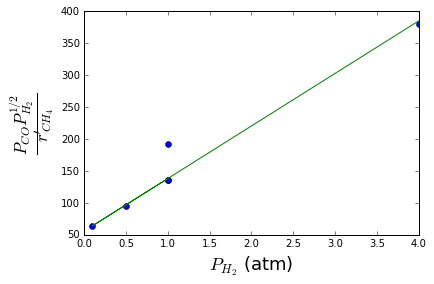

In [11]:
y = PCO * PH2**0.5 / rCH4
plt.plot(PH2, y, 'o')
plt.plot(PH2, PH2*b/a + 1/a, '-')
plt.ylabel("$\\frac{P_{CO} P_{H_2}^{1/2}}{r'_{CH_4}}$", fontsize=24)
plt.xlabel("$P_{H_2}$ (atm)", fontsize=18)
plt.show()